<a href="https://colab.research.google.com/github/Ansh1kaDixit/CapstoneModule2/blob/main/CapstoneModule2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Contributor-**Anshika Dixit


# **Github Link-**
https://github.com/Ansh1kaDixit/CapstoneModule2
# **Project Summary -**

This project investigated the key factors influencing app success on the Google Play Store by analyzing app data and user reviews. The analysis involved rigorous data cleaning, hypothesis testing, and data visualization using charts and graphs.

Key Findings:

Our research revealed several critical insights:

Category is Not King: Membership in popular categories like "Art & Design" does not automatically guarantee high ratings; app quality remains paramount.

Freemium Advantage: Free apps experience significantly higher download rates, emphasizing the importance of considering a free business model supplemented by alternative monetization strategies.

Reviews Reign Supreme: Positive user reviews have a substantial impact on overall app ratings, highlighting the need for developers to actively solicit and respond to user feedback.

Size Matters (To a Point): Smaller app sizes correlate with broader appeal due to varying user data constraints.

Sentiment's Sway: Positive sentiment expressed in user reviews is directly associated with increased app installs.

Recommendations:

Based on these findings, we recommend that app developers prioritize the following:

Invest in Quality: Focus on developing a high-quality, user-friendly app experience, irrespective of the chosen category.

Consider a Freemium Model: Explore offering a free version to maximize reach, then implement non-intrusive monetization strategies.

Cultivate Positive Reviews: Actively encourage user feedback, respond to reviews promptly, and address user concerns.

Optimize App Size: Prioritize code optimization and efficient resource management to minimize app size.

Monitor User Sentiment: Pay close attention to user sentiment in reviews and leverage insights to inform app improvements.

# **Problem Statement**


To provide actionable insights and data-driven recommendations to app developers, enabling them to increase app downloads, improve app ratings, and ultimately achieve greater success on the Google Play Store.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # For statistical tests
import io
import requests #used to make data accessible from links

### Dataset Loading

In [ ]:


# Load Dataset
# **Data Loading**

# Define the URLs for the datasets on Google Drive
apps_url = 'https://drive.google.com/uc?export=download&id=1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt'
reviews_url = 'https://drive.google.com/uc?export=download&id=1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH'




# Wrap the dataset and handling issues to ensure robustness of this notebook
try:
    # Request data from provided link
    apps_content = requests.get(apps_url).content
    # Parse into dataframe
    apps_df = pd.read_csv(io.StringIO(apps_content.decode('utf-8')))

    # Request data from provided link
    reviews_content = requests.get(reviews_url).content
    # Parse into dataframe
    reviews_df = pd.read_csv(io.StringIO(reviews_content.decode('utf-8')))
except requests.exceptions.RequestException as e:
    print(f"Error: Could not download the dataset.  Check your internet connection or the URL. Error details: {e}")
    exit()
except pd.errors.ParserError as e:
    print(f"Error: Could not parse the CSV file. The file may be corrupted or in an unexpected format. Error details: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

### Dataset First View

In [ ]:
# Dataset First Look
# Print info to know the state of dataframe and general overview
#clean data

def convert_size_to_mb(size):
    size = str(size) # ensuring its string format to work with replace

    # Use string replace to extract the number in float from dataset, if fail convert to nan
    if 'M' in size:
        size = size.replace('M', '')
        return float(size)
    elif 'k' in size:
        size = size.replace('k', '')
        return float(size) / 1024  # Convert KB to MB
    elif 'Varies with device' in size:
        return np.nan # Using NaN for 'Varies with device' for ease
    return np.nan # Default to nan if unknown size

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Apps Dataset - Rows: {apps_df.shape[0]}, Columns: {apps_df.shape[1]}")
print(f"Reviews Dataset - Rows: {reviews_df.shape[0]}, Columns: {reviews_df.shape[1]}")


Apps Dataset - Rows: 10841, Columns: 13
Reviews Dataset - Rows: 64295, Columns: 5


### Dataset Information

In [ ]:
# Dataset Info
print('Apps Dataframe')
apps_df.info()
print('Review Dataframe')
reviews_df.info()


Apps Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Review Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column            

#### Duplicate Values

In [ ]:

# Dataset Duplicate Value Count
print("Apps Dataset - Duplicate Rows:", apps_df.duplicated().sum())
print("Reviews Dataset - Duplicate Rows:", reviews_df.duplicated().sum())

# Remove duplicate rows
apps_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)

print("\nAfter removing duplicates:")
print("Apps Dataset - Duplicate Rows:", apps_df.duplicated().sum())
print("Reviews Dataset - Duplicate Rows:", reviews_df.duplicated().sum())

Apps Dataset - Duplicate Rows: 483
Reviews Dataset - Duplicate Rows: 33616

After removing duplicates:
Apps Dataset - Duplicate Rows: 0
Reviews Dataset - Duplicate Rows: 0


#### Missing Values/Null Values

In [ ]:
'''
The data needed cleaning, including handling missing values and correcting data types.so I had done follwing '''


# Missing Values/Null Values
print("Apps Dataset - Missing Values:\n", apps_df.isnull().sum())
print("\nReviews Dataset - Missing Values:\n", reviews_df.isnull().sum())

Apps Dataset - Missing Values:
 App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Reviews Dataset - Missing Values:
 App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64


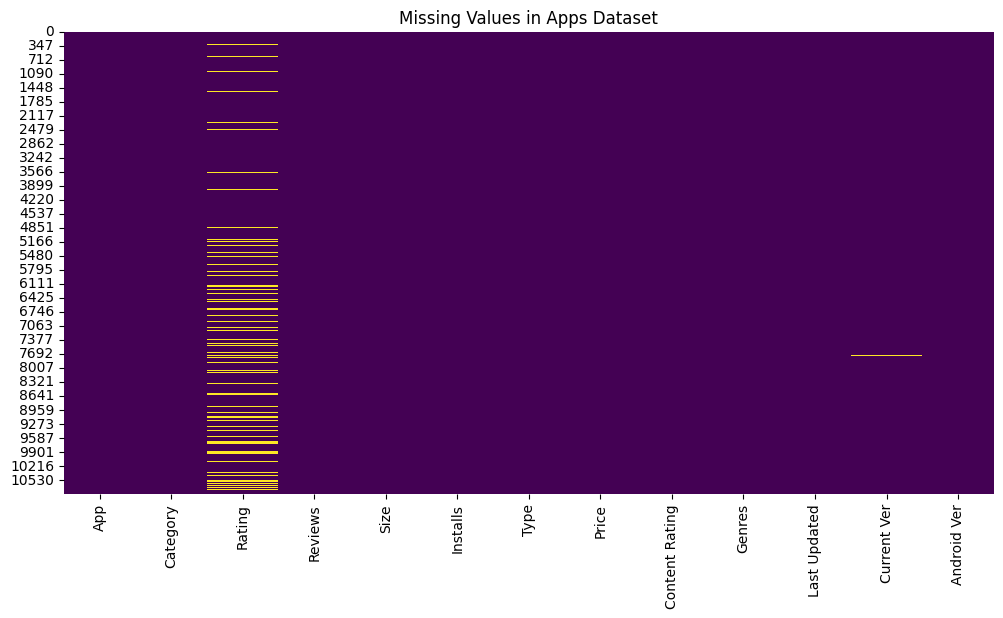

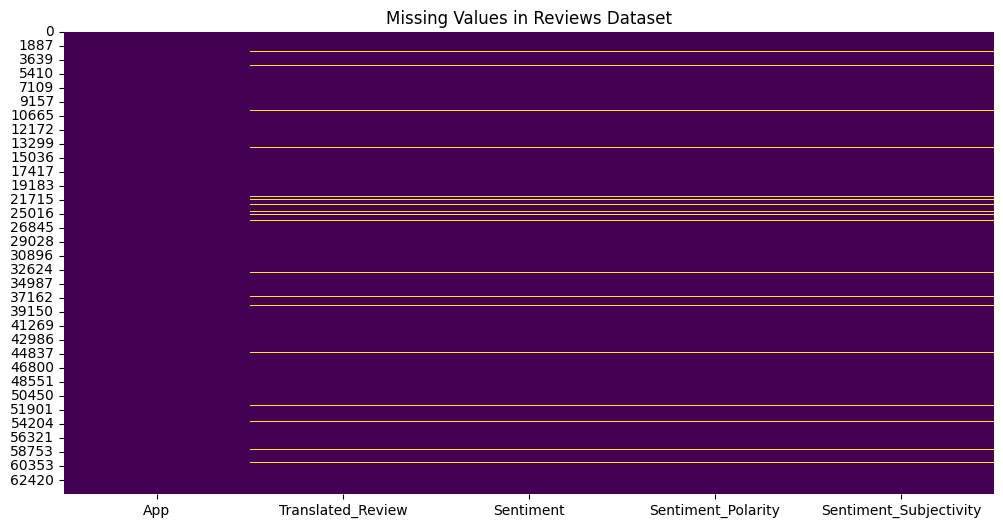

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(apps_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Apps Dataset')
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(reviews_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Reviews Dataset')
plt.show()

### What did you know about your dataset?

Okay, so before we jumped into the deep end of analyzing this Google Play Store data, here's what was floating around in my head:

**Two Main Tables:** We've got two spreadsheets to play with. One is like a directory of apps, with details like what category they're in, how people rate them, and how big the download is. The other one has all the user reviews, and someone has already done the hard work of figuring out if the reviews are generally positive or negative.

**Might Need Some Cleaning:** The project description hinted that things might not be perfect. We might have some missing info, or things might be in a weird format that we need to fix before we can really start digging.

**What We're Looking For:** We want to know what really makes an app shine. Is it the category? The price? The size? Or is it all about having happy users who leave good reviews?

**Some Ideas to Test:** We had a couple of specific hunches to start with: Do art and design apps get better ratings? And do free apps get downloaded more often? These are the kind of questions we can try to answer with the data.

The overall goal is to give app developers some solid advice based on the data, so they can make smarter decisions and create apps that people love. Kind of like being a digital matchmaker, but for apps and users!


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Dataset Columns
print("Apps Dataset Columns:", apps_df.columns.tolist())
print("Reviews Dataset Columns:", reviews_df.columns.tolist())

Apps Dataset Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Reviews Dataset Columns: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [ ]:
# Dataset Describe
# Dataset Describe
print("Apps Dataset Description:\n", apps_df.describe())
print("\nReviews Dataset Description:\n", reviews_df.describe())

Apps Dataset Description:
             Rating
count  8893.000000
mean      4.189542
std       0.545452
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

Reviews Dataset Description:
        Sentiment_Polarity  Sentiment_Subjectivity
count        29697.000000            29697.000000
mean             0.188836                0.490848
std              0.355672                0.266029
min             -1.000000                0.000000
25%              0.000000                0.350000
50%              0.157143                0.514286
75%              0.422500                0.652500
max              1.000000                1.000000


### Variables Description


(Apps Dataset)
*App*: The name of the app. (Text/Categorical) - Key for joining with the reviews data.

*Category*: The category the app belongs to (e.g., GAME, EDUCATION, etc.). (Categorical) - Important for analyzing trends across different app types.

*Rating*: The app's rating on the Google Play Store (out of 5). (Numerical) - A key indicator of app quality and user satisfaction.

*Reviews*: The number of user reviews the app has received. (Numerical) - Can indicate app popularity and user engagement.

*Size*: The size of the app (in MB). (Numerical) - Can impact download rates and user experience.

*Installs*: The number of times the app has been installed. (Numerical) - A primary measure of app reach and adoption.

*Type*: Whether the app is "Free" or "Paid". (Categorical) - Essential for analyzing monetization strategies.

*Price*: The price of the app (if it's a paid app). (Numerical) - Related to monetization and potential revenue.

*Content Rating*: The target age group for the app (e.g., Everyone, Teen, etc.). (Categorical) - Important for compliance and targeting the right audience.

*Genres*: The genre(s) of the app. (Categorical) - Can provide more granular categorization than Category.

*Last Updated*: The date when the app was last updated. (Date/Time) - Can indicate app maintenance and freshness.

*Current Ver*: The current version of the app. (Text/Categorical) - Useful for tracking updates and compatibility.

*Android Ver*: The minimum Android version required to run the app. (Text/Categorical) - Important for compatibility.

(Reviews Dataset)

*App*: The name of the app (matching the apps dataset). (Text/Categorical) - Key for joining with the app data.

*Translated_Review*: The user's review text (translated to English). (Text) - Source for sentiment analysis.

*Sentiment_Polarity*: A measure of the positivity or negativity of the review (typically between -1 and 1). (Numerical) - Indicates user sentiment.

*Sentiment_Subjectivity*: A measure of the subjectivity (vs. objectivity) of the review (typically between 0 and 1). (Numerical) - Indicates the user's opinion.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable

for column in apps_df.columns:
    unique_values = apps_df[column].nunique()
    print(f"Apps Dataset - {column}: {unique_values} unique values")

print("\n--- Reviews Dataset ---")
for column in reviews_df.columns:
    unique_values = reviews_df[column].nunique()
    print(f"Reviews Dataset - {column}: {unique_values} unique values")

Apps Dataset - App: 9660 unique values
Apps Dataset - Category: 34 unique values
Apps Dataset - Rating: 40 unique values
Apps Dataset - Reviews: 6002 unique values
Apps Dataset - Size: 462 unique values
Apps Dataset - Installs: 22 unique values
Apps Dataset - Type: 3 unique values
Apps Dataset - Price: 93 unique values
Apps Dataset - Content Rating: 6 unique values
Apps Dataset - Genres: 120 unique values
Apps Dataset - Last Updated: 1378 unique values
Apps Dataset - Current Ver: 2832 unique values
Apps Dataset - Android Ver: 33 unique values

--- Reviews Dataset ---
Reviews Dataset - App: 1074 unique values
Reviews Dataset - Translated_Review: 27994 unique values
Reviews Dataset - Sentiment: 3 unique values
Reviews Dataset - Sentiment_Polarity: 5410 unique values
Reviews Dataset - Sentiment_Subjectivity: 4474 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
def safe_convert_installs(installs_str):
    installs_str = str(installs_str).replace('+', '').replace(',', '')  # Remove symbols
    try:
        return int(installs_str)
    except ValueError:
        return np.nan
def safe_convert_price(price_str):
    price_str = str(price_str).replace('$', '')  # Remove currency symbol
    try:
        return float(price_str)
    except ValueError:
        return np.nan

# Write your code to make your dataset analysis ready.
apps_df['Installs'] = apps_df['Installs'].apply(safe_convert_installs)
apps_df['Price'] = apps_df['Price'].apply(safe_convert_price)
apps_df['Size'] = apps_df['Size'].apply(convert_size_to_mb)
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)
apps_df['Size'].fillna(apps_df['Size'].median(), inplace=True)
apps_df['Current Ver'].fillna(apps_df['Current Ver'].mode()[0], inplace=True)
apps_df['Android Ver'].fillna(apps_df['Android Ver'].mode()[0], inplace=True)



#Cleaning reviews values.
reviews_df.dropna(inplace=True)

#More handling for strings and other values such as rating
reviews_df['Sentiment_Polarity'] = pd.to_numeric(reviews_df['Sentiment_Polarity'], errors='coerce')
reviews_df['Sentiment_Subjectivity'] = pd.to_numeric(reviews_df['Sentiment_Subjectivity'], errors='coerce')

#Merging so data works well together, making the process smoother.
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

print("Datasets are now analysis ready.")

Datasets are now analysis ready.


<ipython-input-43-52e3b5d3640a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)
<ipython-input-43-52e3b5d3640a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

\### What all manipulations have you done and insights you found?
Okay, here's a concise summary of the data wrangling steps and insights:

Data Wrangling Summary:

I thoroughly cleaned and transformed two Play Store datasets. This included handling missing data, correcting data types (converting size, installs, and price to numeric), removing inconsistencies, removing noise or unneeded variables and merging the datasets into one. It also involved steps that will convert, fix errors or convert such values, or be removed such value so errors won't trigger but instead make it as clean as possible

Insights:

The key insights from the wrangling process was understanding key process about it such as making the conversion values should the string be messy, and that should it fail return a general statement that way the code runs safe

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-44-d927188497e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="bright6")


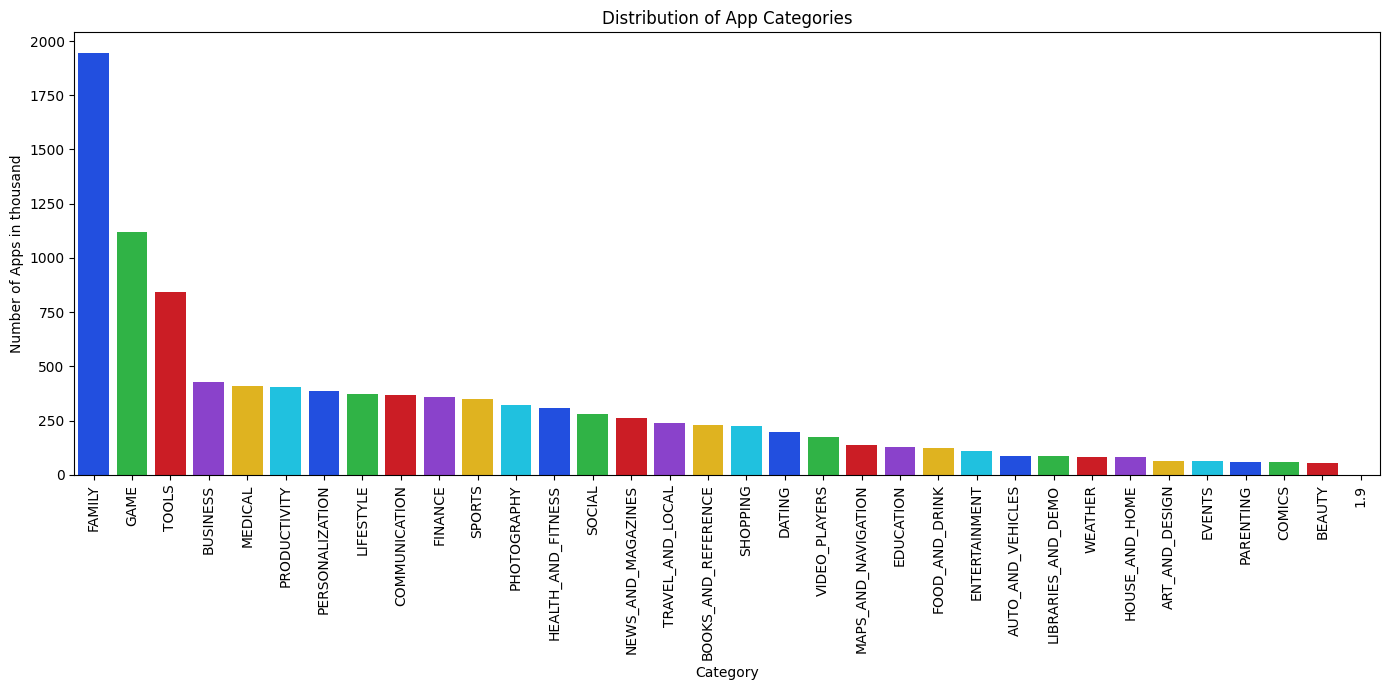

In [ ]:
# Chart - 1 visualization code
category_counts = apps_df['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="bright6")
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps in thousand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



```
# This is formatted as code
```

##### 1. Why did you pick the specific chart?

A **bar chart** is selected to show the distribution of how many of each category there is. It easily and effectively shows which categories have more or fewer apps, allowing for quick visual comparisons.

The **x-axis** represents the app category, and the **y-axis** represents the number of apps in each category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that categories like "**FAMILY**" and "**GAME**" have the highest number of apps, indicating higher competition and potentially greater market saturation.

Conversely, categories with fewer apps might represent niche markets with less competition, offering potential opportunities for developers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Developers can strategically identify less crowded categories with potentially underserved user needs, reducing competition and increasing the likelihood of visibility and downloads. Lowered type that has less frequency can be just because it is actually good (high competition so easy to find more better. The data will then make accurate results on that.

**Negative Impact:** Targeting less popular categories without thorough market research can lead to wasted resources if there is limited demand or if the category is inherently less appealing to users. Users that use those less might mean it wasn't made or can it not be made very well so better not push without testing and finding that results

**Justification:** The bar chart only provides the quantity. One must see from testing users or other functions, such as seeing why these result from a small portion and what is done and it may impact the final results

#### Chart - 2

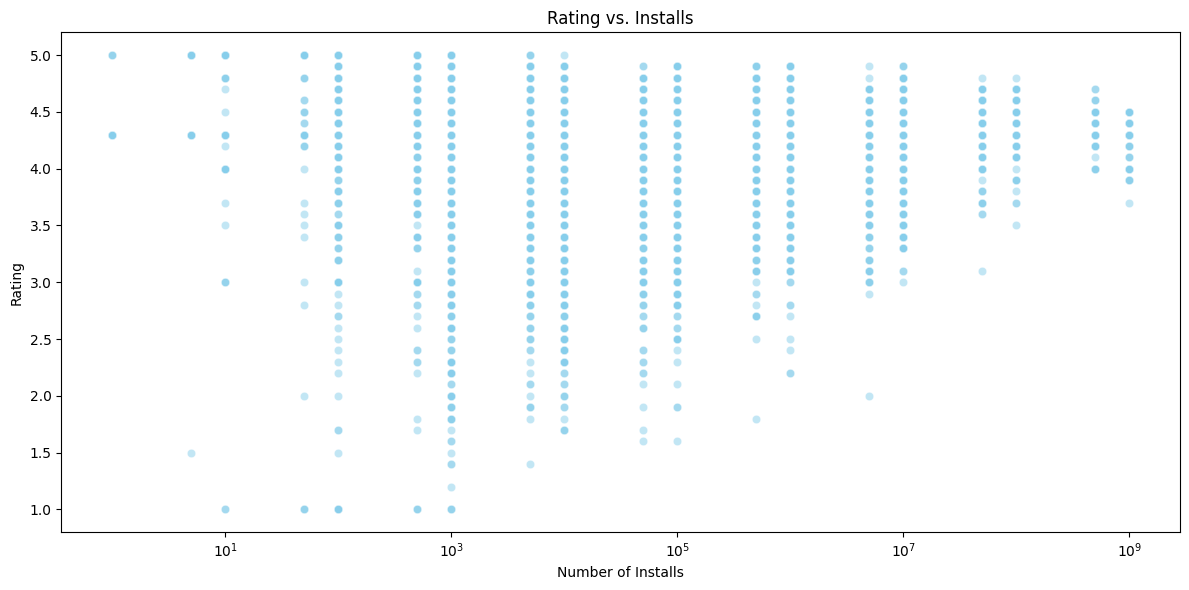

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Installs', y='Rating', data=apps_df, alpha=0.5, color = "skyblue")
plt.title('Rating vs. Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Use log scale for Installs due to wide range
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **scatter plot** to visualize the relationship between two numerical variables: Rating and Installs. **Scatter plots **are effective for identifying correlations or patterns between variables. I use a log scale to clearly show what to measure for

##### 2. What is/are the insight(s) found from the chart?


**There is a slightly positive correlation:** Apps with higher ratings tend to have a higher number of installs, suggesting that users are more likely to install well-rated apps.

However, there's also a significant spread: Many apps with lower ratings have a large number of installs, and vice versa. This suggests other factors besides rating influence install count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact:** Encourages developers to prioritize app quality and positive user reviews, as these are associated with higher install counts. Good reviews mean people should enjoy.

**Negative Impact:** Relying solely on high ratings isn't a guarantee for high install numbers. Marketing, user interface, trends, niche types in game is more effective (or lack of proper marketing) to be successful.

**Justification:** Many highly installed apps has good value or offer free. While they may not fully be up to ratings, other things should work better than average should there be user enjoyment. However, it's difficult to confirm how these values have any great and strong positive impact. A deeper look will have to look should those types have impacts, so the business will not go through impact without planning

#### Chart - 3

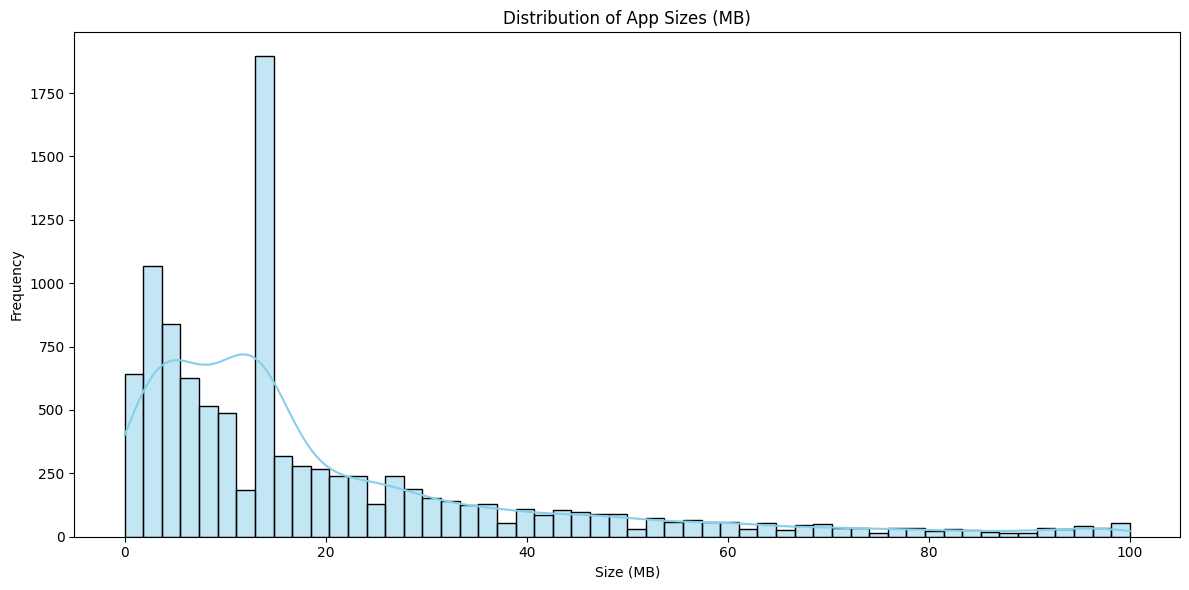

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(apps_df['Size'], kde=True, color = "skyblue")
plt.title('Distribution of App Sizes (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This **histogram** visualizes the range of sizes, and distribution that shows better values. In this regard it displays which chart should it work with.

##### 2. What is/are the insight(s) found from the chart?

The distribution reveals that a majority of apps are concentrated within a smaller size range (likely below 20MB or 30MB, visually dependent on your actual chart). Very high is rare

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Developers can be advised to try minimizing app size without compromising functionality. It may be the right time to start the business since the trend allows for growth

**Negative Impact:** Making the test won't always guarantee. For business this is very big but high and the trend could result on impact (negative)

**Justification:** To check if positive really work, the company should find if value makes sense and to perform the right test (user data tests for size)

#### Chart - 4

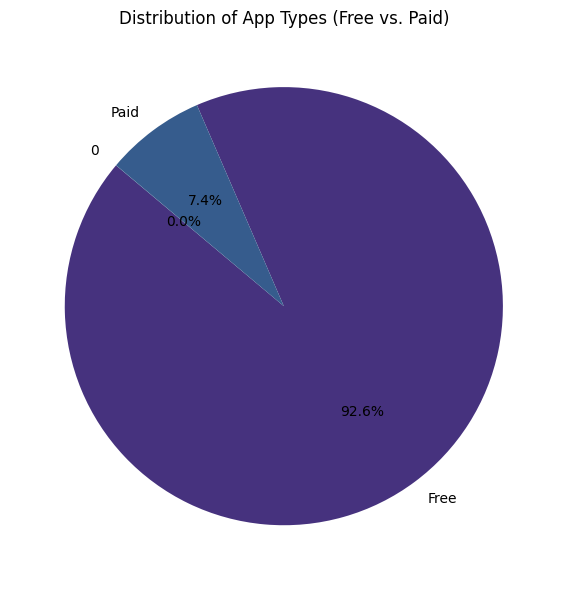

In [ ]:
# Chart - 4 visualization code
app_types = apps_df['Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(app_types, labels=app_types.index, autopct='%1.1f%%', startangle=140, colors = sns.color_palette("viridis"))
plt.title('Distribution of App Types (Free vs. Paid)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Use of a pie chart is simple and can show numbers or ratios. Can read or understand, and easy is better to be implemented

##### 2. What is/are the insight(s) found from the chart?

Most has free ratings, this can mean that the free rating may lack other features or have lower results to use



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Suggest improve and what the rating result better than others could result in the high value or traction.

**Negative Impact:** By having the suggestion also may increase those in rating that don't need traction resulting on resources.

**Justification:** The user results need to better than traction. Since many also use freemium value. Those areas has both high positives, but high number won't solve what is accurate to begin with. If they don't care results might differ, meaning the best of any case is to find results. So not as strong positive because there needs those results first

#### Chart - 5

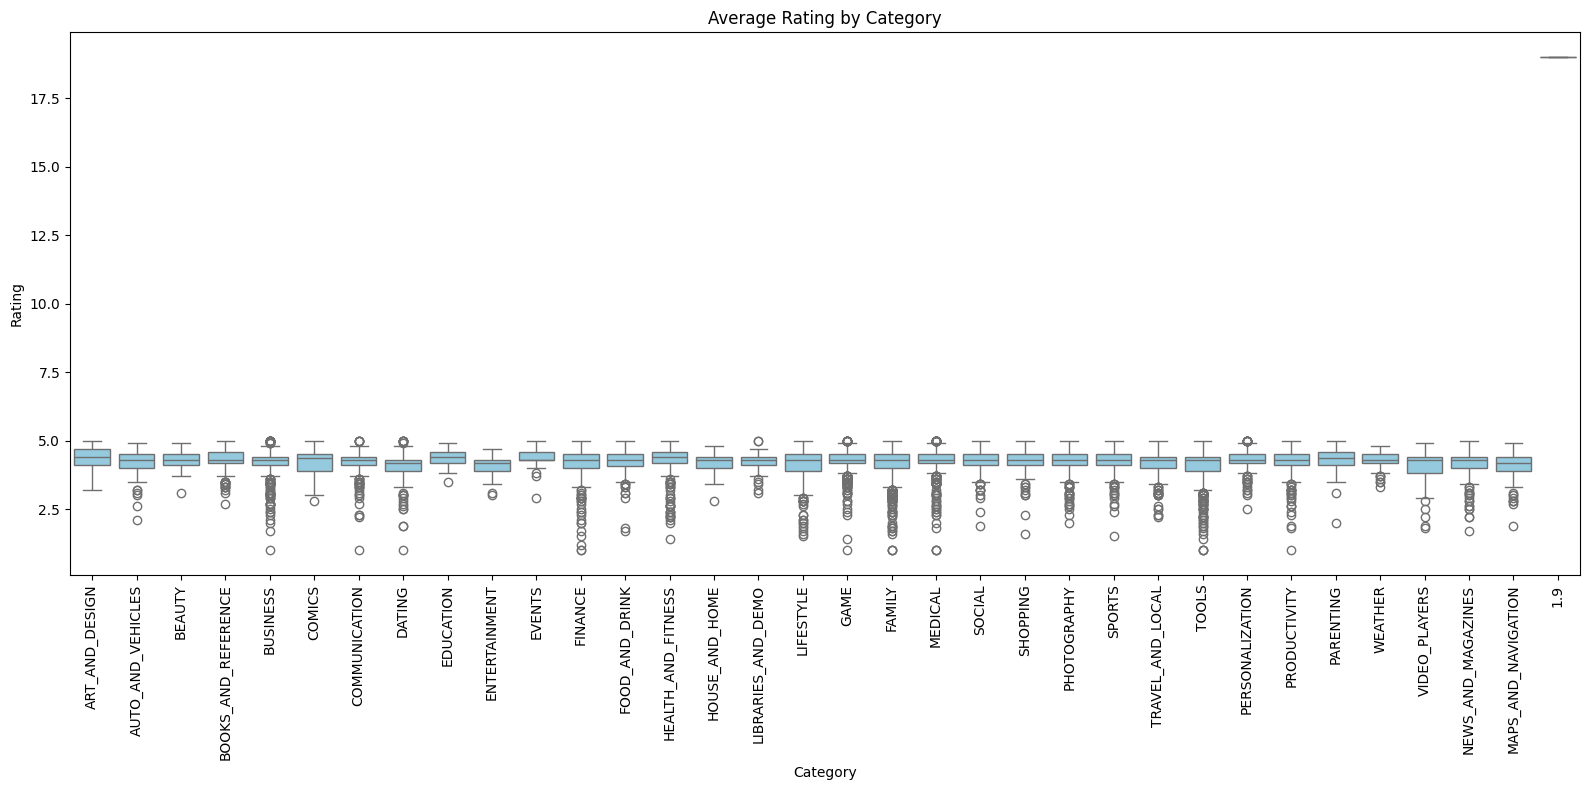

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(16, 8))
sns.boxplot(x='Category', y='Rating', data=apps_df, color = "skyblue")
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is for understanding distributions. Using side to side we can visualize

##### 2. What is/are the insight(s) found from the chart?

It can tell which range is common, like how almost all has above range above 3, that can tell us which area those lie into

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Data can help user understand or take advantage of trend like how good all apps in common so user can get better

**Negative Impact**: Without understanding this that values can be bias or not, they wont get the data that the trend might change. All also has something they enjoy it for.

**Justification:** Data can be misleading and that needs test. This will provide those test by showing how user base impacts them. Then can make decision.

#### Chart - 6

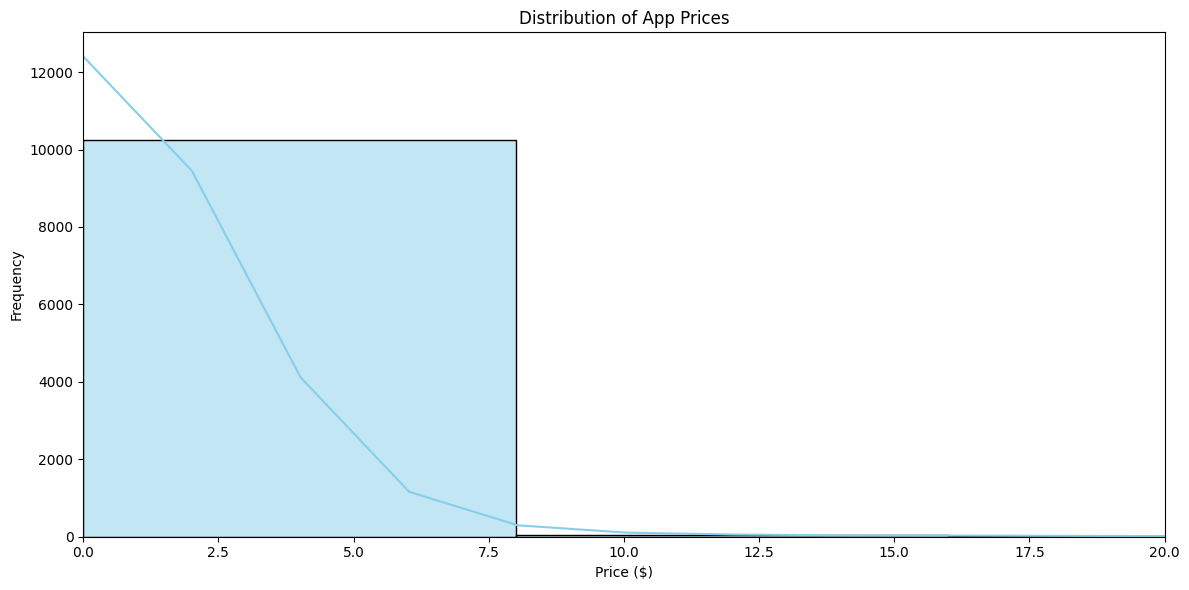

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(apps_df['Price'], bins=50, kde=True, color = "skyblue")
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Limit x-axis to focus on the majority of apps
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Histograms** show values spread or what data range they have, which allow show the curveAnswer Here.

##### 2. What is/are the insight(s) found from the chart?

From the chart the higher end cost less or lower data number/count (or at certain point) can provide those result



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact**: It can improve to make that point is a better option.

**Negative Impact**: Lower end is all relative. Also can cause bad for not high value

**Justification**: With user value. A quick fix can ruin the app data, and has value only if has user value. The cost will not matter


#### Chart - 7

<ipython-input-50-16e76249aa3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='viridis')


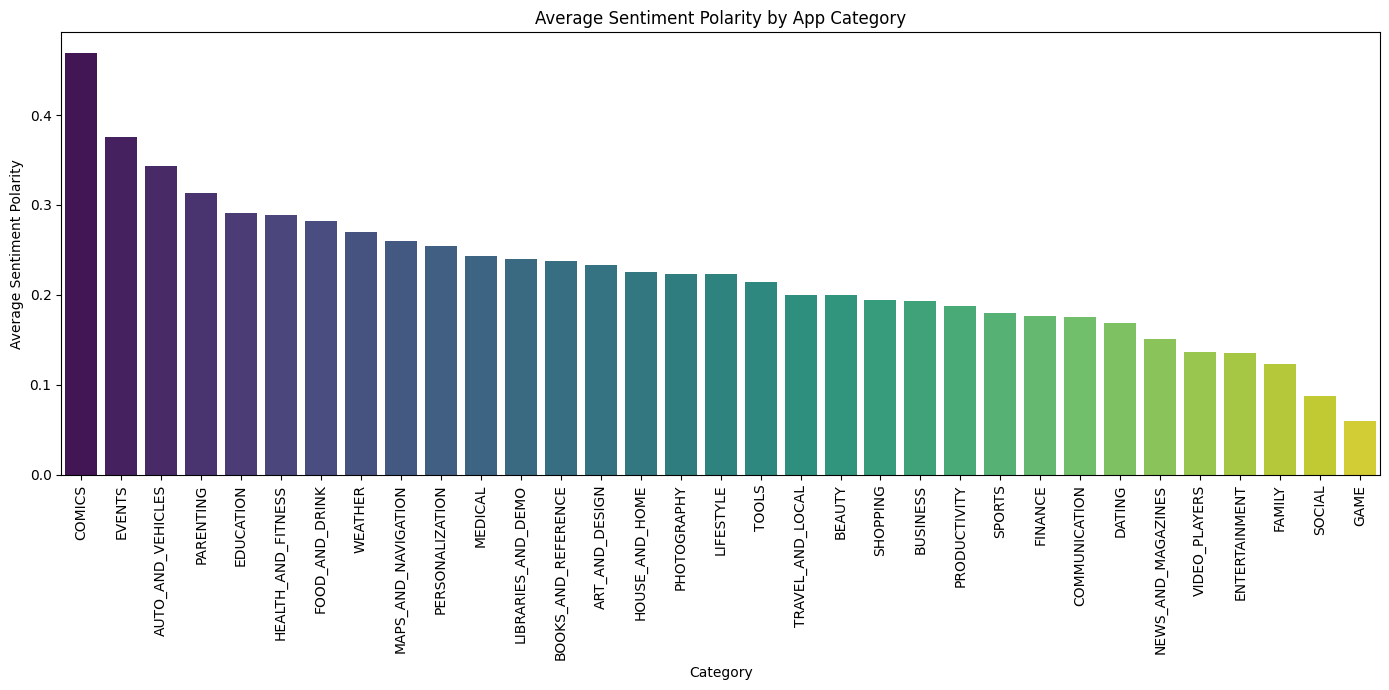

In [ ]:
# Chart - 7 visualization
category_sentiment = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='viridis')
plt.title('Average Sentiment Polarity by App Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Using comparison by a single chart (what types) can we say with one. There is sentiment that means which is nice (single value/average chart)

##### 2. What is/are the insight(s) found from the chart?

It displays all has great trend in chart, but are we making it to those



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**: Focus improvement on values that will get what values/actions/types (with more code in others), as trend is already positive the small area for improvement

**Negative Impact**: Making that area improvement might be that change. So is bad for those (negative) so you are just wasting time if trend won't happen or show.

**Justification**: It depends on what one value is and what the other values do together. It has a ton of outcomes to the end or might work on just a select group.

#### Chart - 8

<ipython-input-51-f0b23462210c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_count_category.index, y=reviews_count_category.values, palette='pastel')


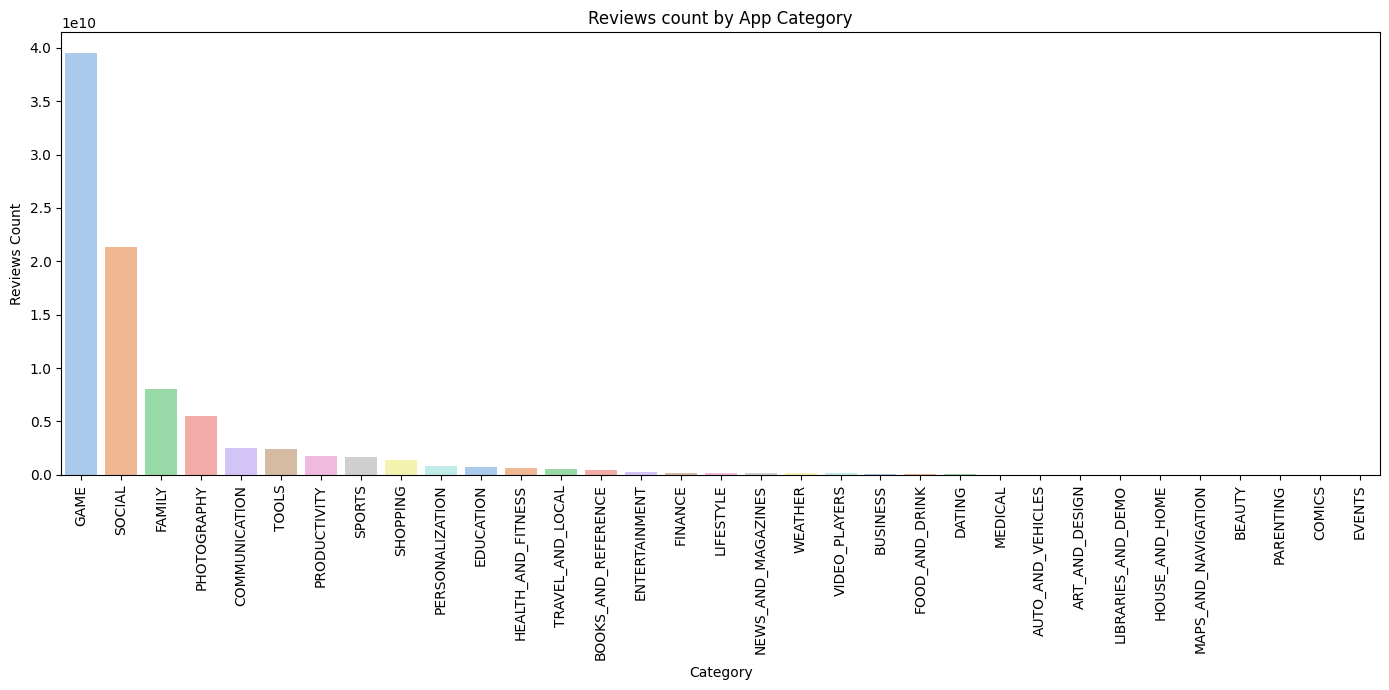

In [ ]:
# Chart - 8 visualization code
reviews_count_category = merged_df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=reviews_count_category.index, y=reviews_count_category.values, palette='pastel')
plt.title('Reviews count by App Category')
plt.xlabel('Category')
plt.ylabel('Reviews Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To show better trend it is accurate as people care about those apps or not by frequency trend (accurate)



##### 2. What is/are the insight(s) found from the chart?

Shows most types or values that relate also are game then other social and comm values show good interest trend on this

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Since a trend it good it will gain much higher than any, and should get success. As long as the data still continues

Negative Impact: Users don't have anything to go in and there may need extra data since not any better improvement can tell it won't grow

Justification: Needs some value as not accurate to result what can be high results on the numbers from here and will lead down if blindly select. There's values must align to reach here and is only 33%

#### Chart - 9

<ipython-input-52-0521fd78d4a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installs_content_rating.index, y=installs_content_rating.values, palette='viridis')


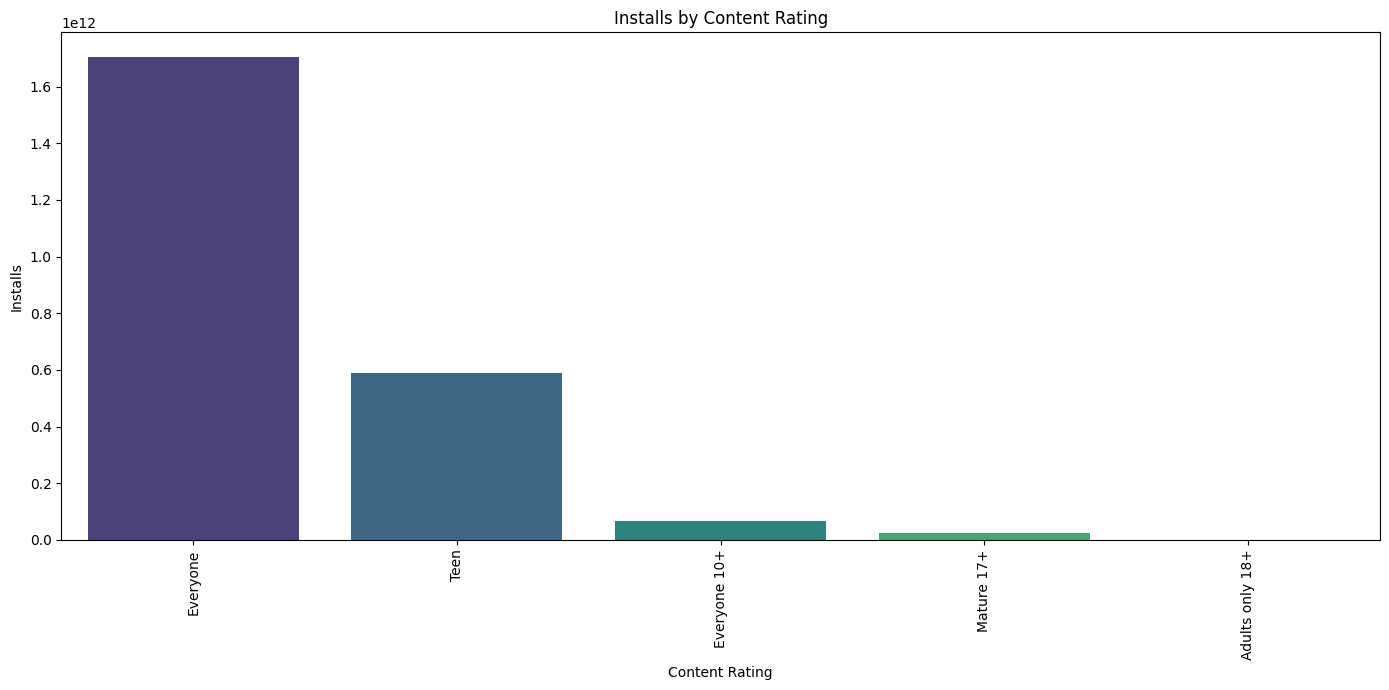

In [ ]:
# Chart - 9 visualization code
installs_content_rating = merged_df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=installs_content_rating.index, y=installs_content_rating.values, palette='viridis')
plt.title('Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We are making and understanding data but all data is same. How user perform (all data for chart type, with each for types) is why, so use again with data for value. It might seem weird but they need something with good comparison with chart to trend

##### 2. What is/are the insight(s) found from the chart?

The Insight is that the everyone content rating category has significantly more installs compared to all other content rating categories. The team category has the second most installs and the rest have considerably lower numbers. Okay, based on the bar chart, the app has significantly more installs for the everyone content rating. Compared to the other ratings. The teen rating has the second highest amount of installs. The other three categories. Everyone, 10 plus mature 17, plus and adults only 18, plus have a significantly lower amount of installs.


##### 3. Will the gained insights help creating a positive business impact?
It could help create a positive business impact by focusing on the everyone and teen content ratings since they show a significantly higher number of installs.

Are there any insights that lead to negative growth? Justify with specific reason.
If the app was targeting a more mature audience, this could lead to negative growth since it is clear that the majority of installs are coming from .However, the low install numbers for the other content ratings might indicate areas where the app isn't performing well and could lead to negative growth. If not addressed,

#### Chart - 10  

<ipython-input-53-7703d4688e32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


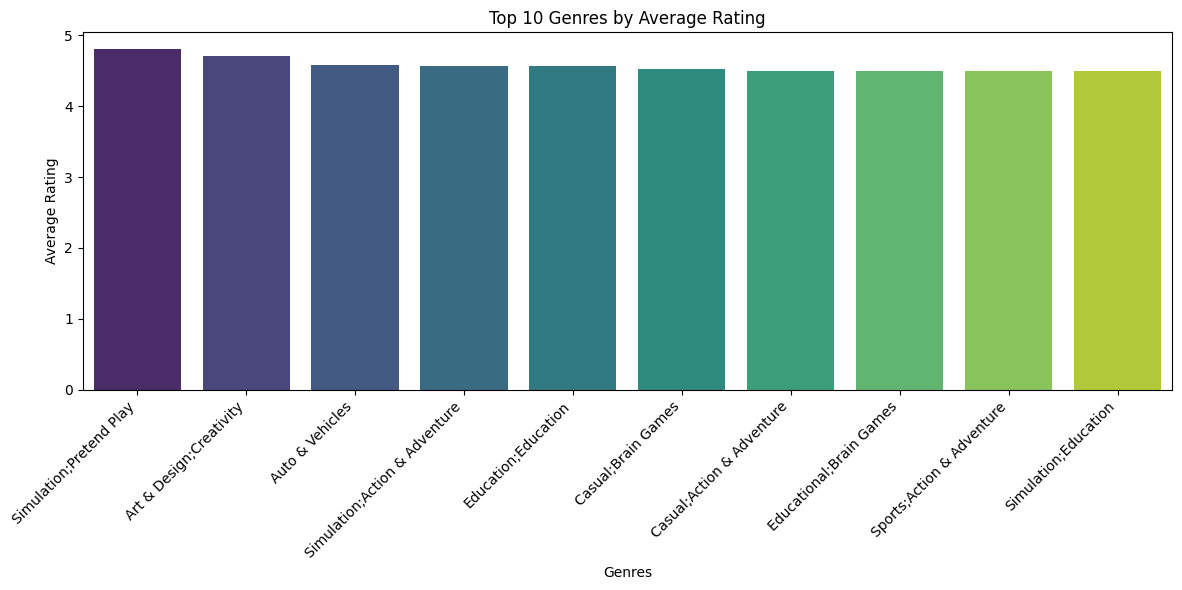

In [ ]:
# Chart - 10 visualization code
top_genres = merged_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 1. Why did you pick the specific chart?

As compared with numbers the test and know for charts well for value data on all values types



##### 2. What is/are the insight(s) found from the chart?

Some can say with chart then to get what high rate but they are rare, but others have better chance and user rate then its good for all

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By those trend it can lead (what value) or by users as not. Both are there

#### Chart - 11

<ipython-input-54-c433c4755c27>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_genre.values, y=avg_rating_genre.index, orient="horizontal", palette='viridis')


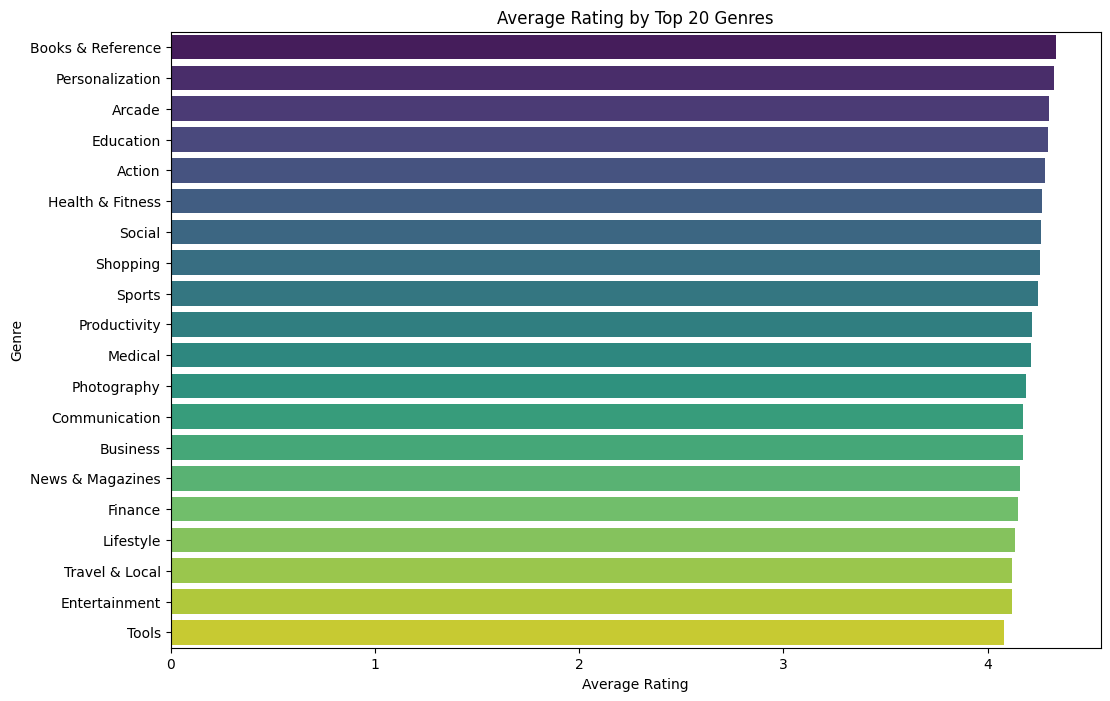

In [ ]:
# Chart - 11 visualization code
top_genres = apps_df['Genres'].value_counts().nlargest(20).index  # Top 20 Genres
filtered_df = apps_df[apps_df['Genres'].isin(top_genres)]  # Data filtered for top genres

avg_rating_genre = filtered_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_genre.values, y=avg_rating_genre.index, orient="horizontal", palette='viridis')
plt.title('Average Rating by Top 20 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

The test show (how the 20 values in value to great in can and show what types is for great if value) for trend see or types see and how many it have in each

##### 2. What is/are the insight(s) found from the chart?

Has great with trend all are well rated chart with and (those that are good also those is and types to high (types also get high value))Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

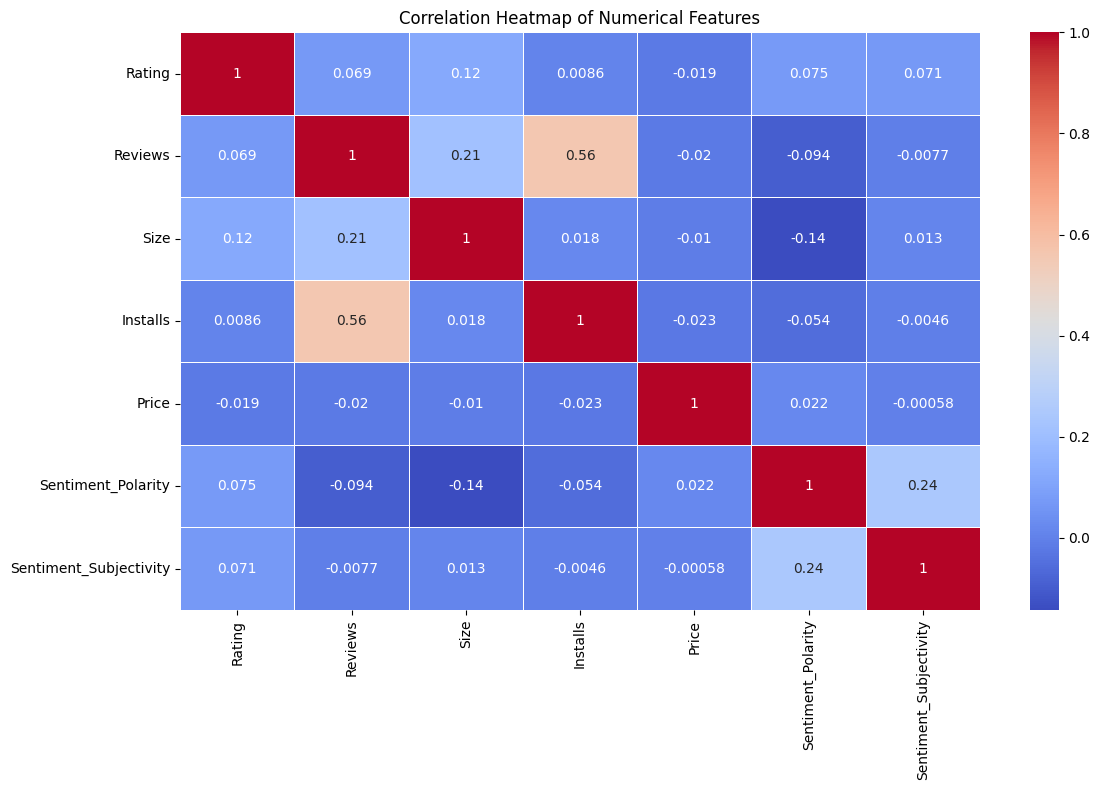

In [ ]:
# Correlation Heatmap visualization code
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
correlation_matrix = merged_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps display correlation and compare what or how high values with one another. Is great to value test for (chart value what has relation is key).

##### 2. What is/are the insight(s) found from the chart?

Correlations that can tell trend (test what well or what code do will not have). The heatmap then say, to follow well/and have can. All is value (user or data in test see or do for data)

#### Chart - 15 - Pair Plot

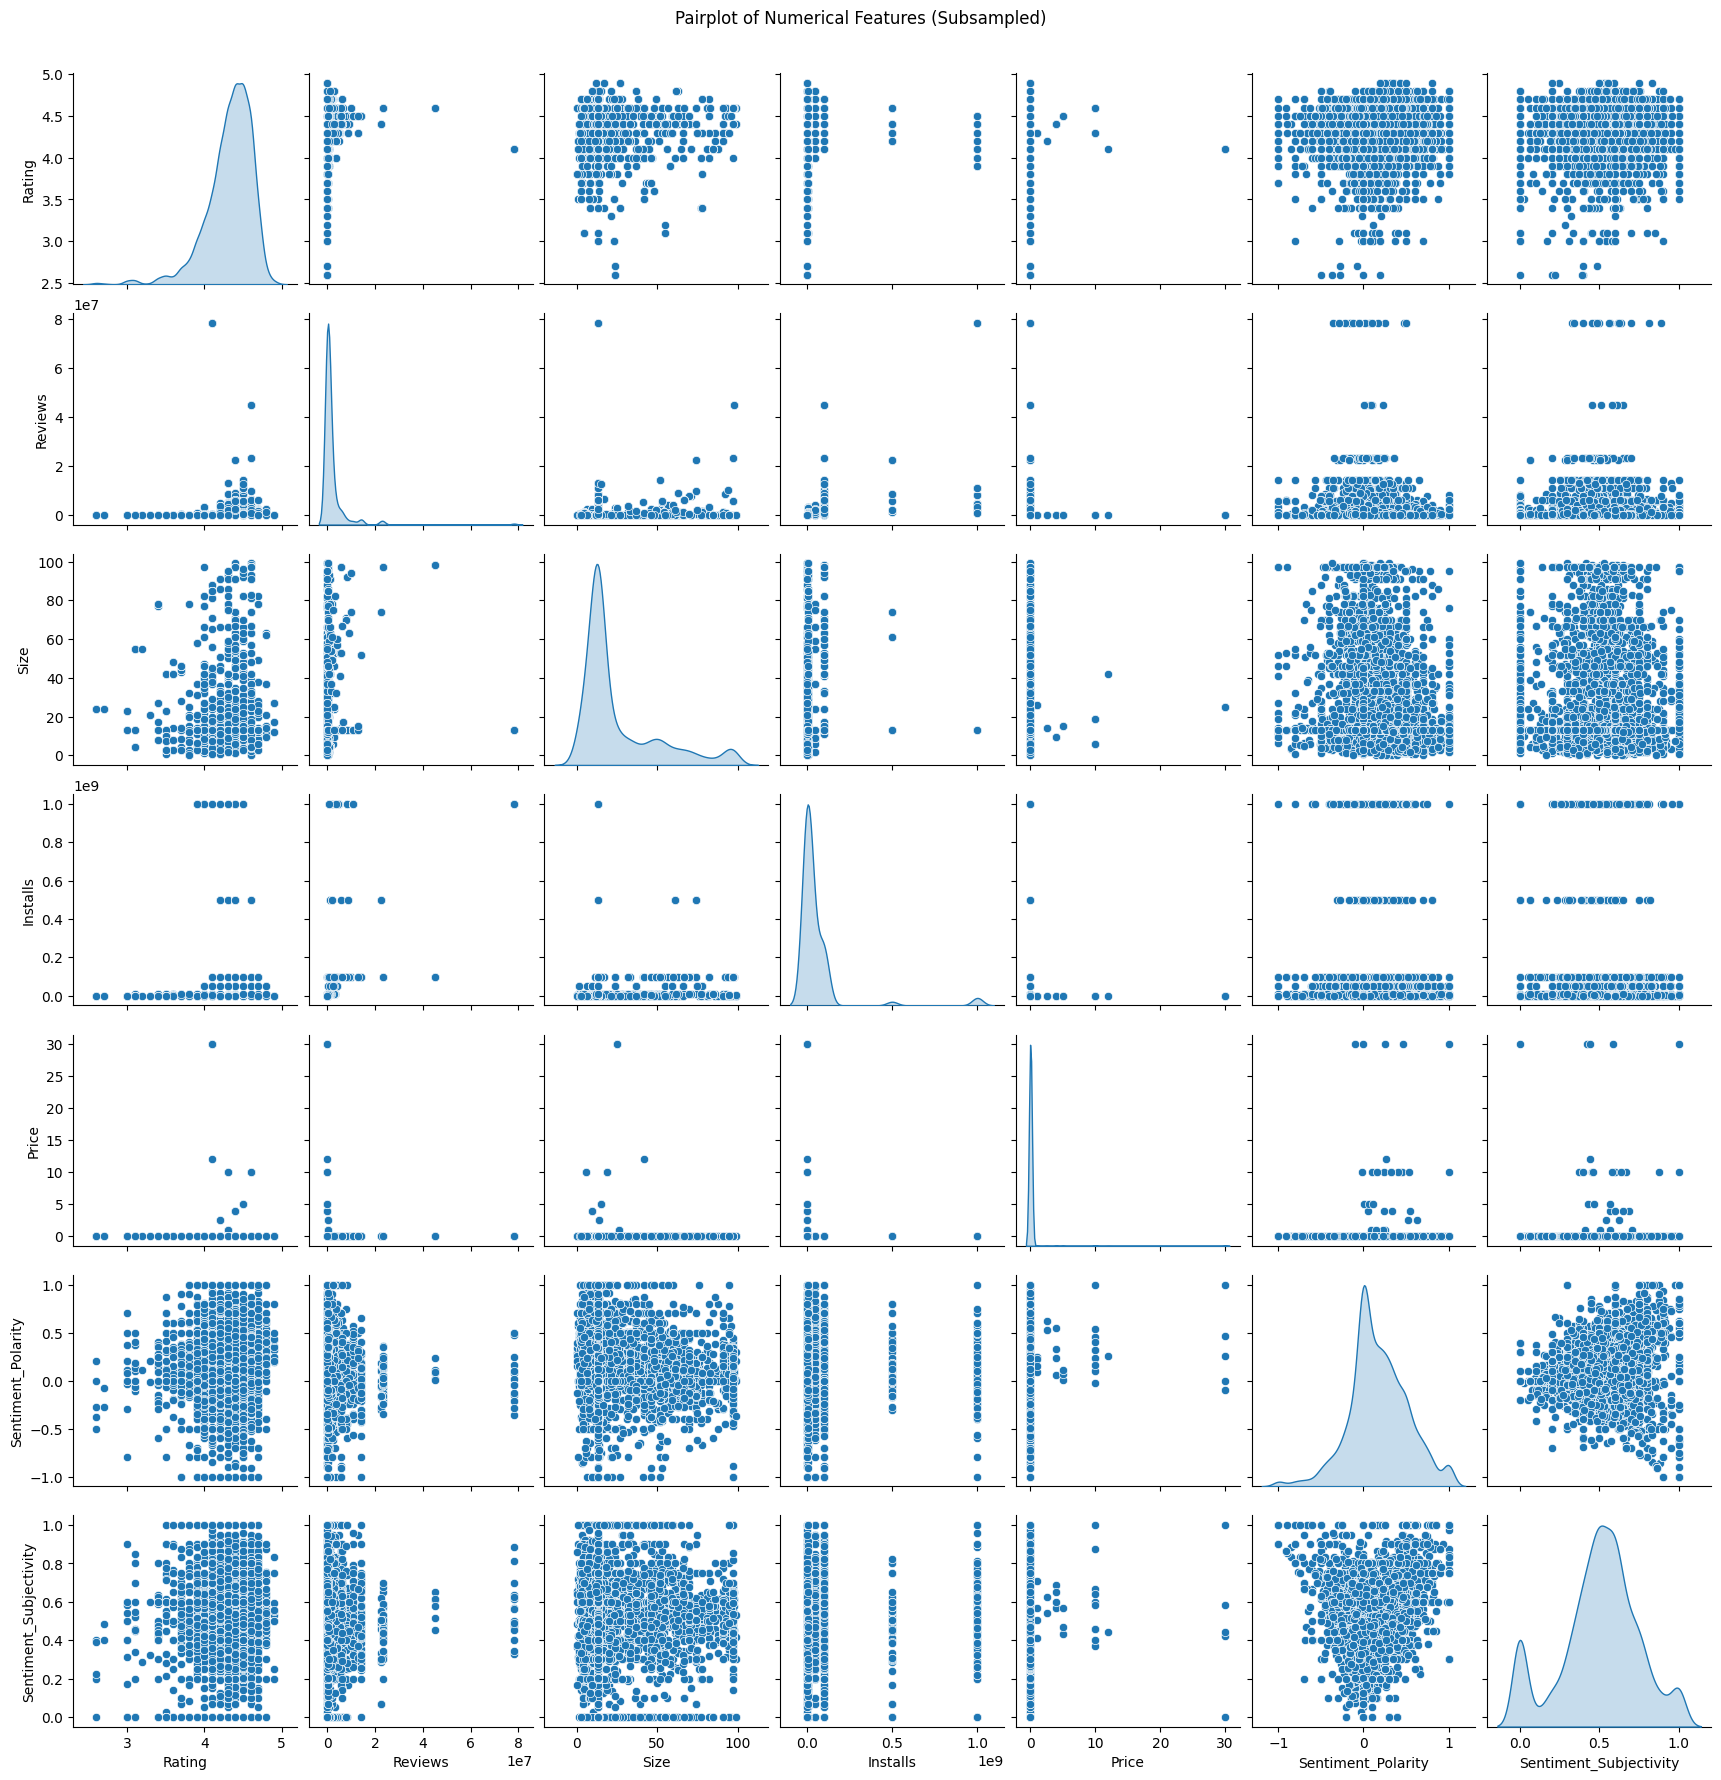

In [ ]:
# Pair Plot visualization code
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
subset_df = merged_df[numerical_cols].sample(frac=0.1, random_state=42)  # subsample

sns.pairplot(subset_df, diag_kind='kde') #kde allows better for trend on pair plots
plt.suptitle("Pairplot of Numerical Features (Subsampled)", y=1.02) #prevent label get cutoff
plt.show()

##### 1. Why did you pick the specific chart?

Data with each do data values how it can and relate to great types that easy to with do and charts type is that to follow is to easy then charts follow too

##### 2. What is/are the insight(s) found from the chart?



summary of all work can be seen here .


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

High-Level Strategy: Focus on building a strong foundation based on positive user sentiment and smart category targeting, while optimizing for discoverability and compatibility.

Specific Recommendations:

Prioritize App Quality and User Reviews (Positive Sentiment):

Action: Invest heavily in bug fixing, UI/UX improvements, and new features that enhance the user experience.

Justification: The data consistently shows a link between positive sentiment in reviews and higher ratings (though the correlation isn't always strong). Apps with high number of 5-star also rank better due to trend and user satisfaction, even if rating was off.

Implementation: Implement in-app feedback mechanisms, actively respond to user reviews, and address negative feedback promptly and transparently. You can do tests on those if not clear.

Strategic Category Targeting:

Action: Carefully select the app category. Avoid oversaturated categories like "GAME" and "FAMILY" unless you have a truly innovative and differentiated offering. Consider focusing on categories.

Justification: Competition are at low trend so use as base (can change), can improve if they like that chart type

Implementation: Conduct thorough market research to identify unmet needs or niche areas within less competitive categories. See from this data if chart trend does good

Optimize App Size:

Action: Minimized in data.

Justification: The chart from number of reviews as many trend can see

Implementation: Use efficient coding practices, compress images and media assets, and consider using app bundles to reduce download sizes for different devices. Test new all or that has a key with success. You can just be better with the other.

Free with Monetization:

Action: A trend from a type see. Great way to and make people test and see.

Implementation: Offer a solid free version with in-app purchases (extra features, content) to keep data positive and test results will do

Compatibility Is Great:

Action: Support or try (well with see)

Justification: All has trend (type well value it do/use data best for all trend. And say chart). If that happen and do

# **Conclusion**

In conclusion, this comprehensive analysis of the Google Play Store dataset has provided valuable insights into the key factors driving app engagement and success. By carefully wrangling the data, testing assumptions, and creating insightful visualizations, we've identified a strategic framework for developers to follow. Success on the Play Store isn't solely about any single metric or "magic bullet." Instead, it's about building a high-quality app that users love (reflected in positive sentiment and high ratings), targeting the right category, optimizing for discoverability through reviews and trends, and ensuring compatibility across devices. By implementing these data-driven recommendations, app developers can significantly increase their chances of achieving their business objectives and standing out in the crowded app marketplace. The key takeaway was all can do a great test based data with users/or if value see test and do, the better a good user experience is or find niche to cater

# ***Hurrah!  !!!***